# Détection et reconnaissance des panneaux de signalisation

https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5088816-apprenez-a-construire-un-cnn-et-gagnez-du-temps-avec-le-transfer-learning

Contexte du projet

Dans le monde de l'IA des grandes entreprises comme Tesla, Uber, Google, Mercedes-Benz, etc. travaillent sur des véhicules autonomes et des voitures autonomes. Pour atteindre la précision de cette technologie, les véhicules doivent être capables d'interpréter les panneaux de signalisation et de prendre des décisions en conséquence. Votre objectif est de construire un modèle qui permet de réaliser cette tâche.

Une interface graphique est demandée:

    Qui permet de détecter dans une image les panneaux de signalisation et les reconnaitre (Afficher le label en Français).
    Qui permet de détecter tous les panneaux dans une vidéo les reconnaitre et les afficher avec leurs labels.


# ETAPES DE CLASSIFICATION DES PANNEAUX

Description du jeu de données

Import des  librairies

Ouverture des fichiers de données et visualisation de chaque fichier

Récupération des images et de leurs étiquettes

Construction du modèle CNN (Convolutional Neural Network)

Formation et validation le modèle

In [ ]:
 Interface graphique du classificateur des panneaux de signalisation

## Description du jeu de données

In [2]:
from IPython.display import IFrame, display
filepath = "structuredujeudedonnees.PNG"
IFrame(filepath, width=900, height=200)

- Répertoire Meta

    43 panneaux "types" de signalisation ou 43 classes (cf cellule suivante, visualisation des classes)
    

- Répertoire Test

    Images mélangées aléatoirement de tailles et formes différentes représeantant chacune des 43 panneaux
    


- Répertoire Train

    43 répertoires, un par panneau "type" avec des images de différentes tailles et formes rangées 
    

* Meta.csv

    Fichier récap : description des 43 classes => numéro de classe, (cf visualisation)
    

* Test.csv

    Fichier récap : chemin des images, dimension des images (hauteur, largeur, roi, class id, nom) (cf visualisation)
    

* Train.csv

    Fichier récap : chemin des images, dimension des images (idem que fichier test hauteur, largeur, ROI,class id)(cf visualisation)
    

## Description des classes

In [3]:
classes = { 0: "Vitesse limite (20km/h)", 
           1: "Vitesse limite (30km/h)", 
           2: "Vitesse limite (50km/h)", 
           3: "Vitesse limite (60km/h)", 
           4: "Vitesse limite (70km/h)", 
           5: "Vitesse limite (80km/h)",
           6: "Fin de limite de vitesse (80km/h)", 
           7: "Vitesse limite (120km/h)", 
           8: "Speed limit (120km/h)",
           9: "Dépassement interdit", 
           10: "Dépassement interdit pour >3.5t", 
           11: "Priorité à droite à l’intersection",
           12: "Route prioritaire", 
           13: "Cédez le passage", 
           14: "Stop", 
           15: "Interdit aux véhicules", 
           16: "Véhicules >3.5t interdits",
           17: "Sens interdit", 
           18: "Panneau danger", 
           19: "Virage dangereux à gauche", 
           20: "Virage dangereux à droite", 
           21: "Succession de virages", 
           22: "Cassis ou dos-d’ânes", 
           23: "Route glissante", 
           24: "Chaussée rétrécie par la droite",
           25: "Travaux", 
           26: "Feux tricolore", 
           27: "Passage piéton", 
           28: "Attention enfants", 
           29: "Attention vélos",
           30: "Attention neige/verglas", 
           31: "Passage animaux sauvages", 
           32: "Fin de toutes interdictions", 
           33: "Direction obligatoire à droite", 
           34: "Direction obligatoire à gauche", 
           35: "Direction obligatoire tout droit", 
           36: "Direction obligatoire tout droit ou à droite", 
           37: "Direction obligatoire tout droit ou gauche", 
           38: "Contournement obligatoire par la droite", 
           39: "Contournement obligatoire par la gauche", 
           40: "Giratoire",
           41: "Fin de l’interdiction de dépassement", 
           42: "Fin de l’interdiction de dépassement >3.5t"}

## Import des  librairies 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.utils import to_categorical
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Ouverture des fichiers de données et visualisation de chaque fichier

In [5]:
input_path = 'C:/Users/utilisateur/Google Drive/microsoft_ia/Google Drive/projets/ia/Reconnaissance de panneaux/Data_Signs/'

train_csv = pd.read_csv(input_path + 'Train.csv')
test_csv = pd.read_csv(input_path + 'Test.csv')
meta_csv = pd.read_csv(input_path + 'Meta.csv')




In [6]:
#visualtion du fichier train
train_csv



,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


Nous constatons que nous avons 39 209 données

In [7]:
#nombre d'images par classe dans le fichier train
train_csv[train_csv.columns[6]].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

In [8]:
#visualtion du fichier test
test_csv


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [9]:
#visualtion du fichier mata
meta_csv

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


## Récupération des images et de leurs étiquettes

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Nous avons stocké toutes les images et leurs étiquettes dans des listes (données et étiquettes).

Nous convertissons la liste en tableaux numpy pour alimenter le modèle.



In [12]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


La forme des données est (39209, 30, 30, 3) ce qui signifie qu'il y a 39.209 images de taille 30 × 30 pixels et le 3  signifie que les données contiennent des images colorées (valeur RVB).

Avec le package sklearn, nous utilisons la méthode train_test_split () pour fractionner les données d'entraînement et de test.



In [13]:
#fractionnement du jeu de donnees
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Notre jeu de données comprend donc 31 367 images couleurs 30x30 pixels et notre jeu test 7 842 images couleurs de 30x30 pixels

À partir du package keras.utils, nous utilisons la méthode to_categorical pour convertir les étiquettes présentes dans y_train et t_test en un encodage.

In [14]:
#converion des étiquettes
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Construction du modèle CNN (Convolutional Neural Network)

Pour classer les images dans leurs catégories respectives, nous allons construire un modèle CNN . CNN est le meilleur à des fins de classification d'images.

L'architecture de notre modèle est:

    - 2 Couches Conv2D (filtre = 32, kernel_size = (5,5), activation = "relu")
    - Couche MaxPool2D (pool_size = (2,2))
    - Couche d'abandon (taux = 0,25)
    - 2 Couche Conv2D (filtre = 64, kernel_size = (3,3), activation = "relu")
    - Couche MaxPool2D (pool_size = (2,2))
    - Couche d'abandon (taux = 0,25)
    - Aplatir le calque pour presser les calques en 1 dimension
    - Couche dense entièrement connectée (256 nœuds, activation = "relu")
    - Couche d'abandon (taux = 0,5)
    - Couche dense (43 nœuds, activation = "softmax")



In [15]:
#construction du modèle :
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


Nous compilons le modèle avec l'optimiseur Adam qui fonctionne bien et la perte est «categorical_crossentropy» car nous avons plusieurs classes à catégoriser.

In [16]:
#compilation du modèle:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Formater et valider le modèle

Après avoir construit l'architecture du modèle, nous entraînons le modèle à l'aide de model.fit (). 
Le modèle fonctionne mieux avec le lot 64 que 32;
Et après 15 époques, la précision était stable.

In [17]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 119s 237ms/step - loss: 3.3595 - accuracy: 0.2976 - val_loss: 0.4179 - val_accuracy: 0.9138
Epoch 2/15
491/491 [==============================] - 136s 276ms/step - loss: 0.6385 - accuracy: 0.8212 - val_loss: 0.1413 - val_accuracy: 0.9612
Epoch 3/15
491/491 [==============================] - 117s 237ms/step - loss: 0.3455 - accuracy: 0.9055 - val_loss: 0.0819 - val_accuracy: 0.9777
Epoch 4/15
491/491 [==============================] - 120s 244ms/step - loss: 0.2422 - accuracy: 0.9320 - val_loss: 0.0678 - val_accuracy: 0.9841
Epoch 5/15
491/491 [==============================] - 136s 278ms/step - loss: 0.1966 - accuracy: 0.9454 - val_loss: 0.0649 - val_accuracy: 0.9841
Epoch 6/15
491/491 [==============================] - 124s 253ms/step - loss: 0.1684 - accuracy: 0.9536 - val_loss: 0.0493 - val_accuracy: 0.9871
Epoch 7/15
491/491 [==============================] - 115s 234ms/step - loss: 0.1631 - accuracy: 0.9579 - val_loss: 0.0395 -

In [18]:

model.save("mymodel.h5")

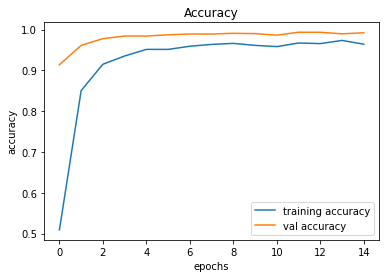

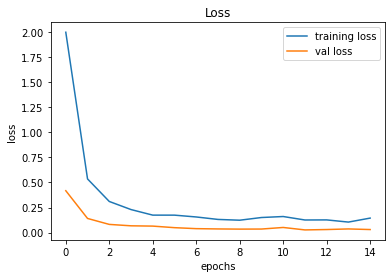

In [19]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [20]:
# Tester notre modèle avec le test dataser

Notre ensemble de données contient un dossier de test et dans un fichier test.csv, nous avons les détails liés au chemin de l'image et à leurs étiquettes de classe respectives. Nous extrayons le chemin de l'image et les étiquettes à l'aide de pandas. Ensuite, pour prédire le modèle, nous devons redimensionner nos images à 30 × 30 pixels et créer un tableau numpy contenant toutes les données d'image. À partir de sklearn.metrics, nous avons importé le precision_score et observé comment notre modèle prédisait les étiquettes réelles. Nous avons atteint une précision de 95% dans ce modèle.

In [21]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

pred = model.predict_classes(X_test)

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
#accuracy avec la donnée test
accuracy_score(labels, pred)

0.9663499604117182

Avec une accuracy à 96.6%, nous vous pouvons dire que notre système est plutôt performant.

In [23]:
#on enregistre le modèle que nous avons entrainé en utiliser la fonction Keras model.save()
model.save('traffic_classifier.h5')

# Interface graphique du classificateur des panneaux de signalisation

Nous allons maintenant créer une interface utilisateur graphique pour notre classificateur de panneaux de signalisation avec Tkinter. Tkinter est une boîte à outils d'interface graphique dans la bibliothèque python standard.

Dans ce fichier, nous avons d’abord chargé le modèle entraîné ‘traffic_classifier.h5’ à l’aide de Keras.

Et puis nous construisons l'interface graphique pour télécharger l'image et un bouton est utilisé pour classifier qui appelle la fonction classify (). 
La fonction classify () convertit l'image en dimension de forme (1, 30, 30, 3). 
En effet, pour prédire le panneau de signalisation, nous devons fournir la même dimension que nous avons utilisée lors de la construction du modèle. 
Ensuite, nous prédisons la classe, le model.predict_classes (image) nous renvoie un nombre c qui représente la classe à laquelle il appartient. Nous utilisons le dictionnaire pour obtenir les informations sur la classe.

In [37]:
# Import des librairies
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [38]:
#Charger notre fichier
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [39]:
#détail des classes
classes = { 1: "Vitesse limite (20km/h)", 
           2: "Vitesse limite (30km/h)", 
           3: "Vitesse limite (50km/h)", 
           4: "Vitesse limite (60km/h)", 
           5: "Vitesse limite (70km/h)", 
           6: "Vitesse limite (80km/h)",
           7: "Fin de limite de vitesse (80km/h)", 
           8: "Vitesse limite (120km/h)", 
           9: "Speed limit (120km/h)",
           10: "Dépassement interdit", 
           11: "Dépassement interdit pour >3.5t", 
           12: "Priorité à droite à l’intersection",
           13: "Route prioritaire", 
           14: "Cédez le passage", 
           15: "Stop", 
           16: "Interdit aux véhicules", 
           17: "Véhicules >3.5t interdits",
           18: "Sens interdit", 
           19: "Panneau danger", 
           20: "Virage dangereux à gauche", 
           21: "Virage dangereux à droite", 
           22: "Succession de virages", 
           23: "Cassis ou dos-d’ânes", 
           24: "Route glissante", 
           25: "Chaussée rétrécie par la droite",
           26: "Travaux", 
           27: "Feux tricolore", 
           28: "Passage piéton", 
           29: "Attention enfants", 
           30: "Attention vélos",
           31: "Attention neige/verglas", 
           32: "Passage animaux sauvages", 
           33: "Fin de toutes interdictions", 
           34: "Direction obligatoire à droite", 
           35: "Direction obligatoire à gauche", 
           36: "Direction obligatoire tout droit", 
           37: "Direction obligatoire tout droit ou à droite", 
           38: "Direction obligatoire tout droit ou gauche", 
           39: "Contournement obligatoire par la droite", 
           40: "Contournement obligatoire par la gauche", 
           41: "Giratoire",
           42: "Fin de l’interdiction de dépassement", 
           43: "Fin de l’interdiction de dépassement >3.5t"}

In [40]:
#initialisation tkinter
top=tk.Tk()
top.geometry('800x600')
top.title('Classification des panneaux de signalisation')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

In [41]:
#convertion de l'image en dimension de forme (1, 30, 30, 3) aux mêmes dimensions que notre modèle
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [42]:
#bouton pour classifier et utiliser la fonction précédente
def show_classify_button(file_path):
    classify_b=Button(top,text="Classification image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)


In [43]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass


In [44]:
upload=Button(top,text="Télécharger image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))


In [45]:
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Connaitre panneau de signalisation",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Travaux
Feux tricolore
